## PROBLEM:
Ask the user to supply the mean and standard deviation of a 1D Gaussian

For the given mean and std, draw 1,000,000 random samples from the 1D Gaussian 

Build a dataset 𝒟 with 1,000 histogram bins 

Split the dataset into train (90%) and test (10%): 𝒟={𝒟_𝑡𝑟𝑎𝑖𝑛,𝒟_𝑡𝑒𝑠𝑡 }. Make sure both train and test are IID.

Using pure Python3 and Numpy, build a 3-layer neural networks: 

Layers: {1−64−𝑅𝑒𝐿𝑈−64−𝑅𝑒𝐿𝑈−64−1−𝑠𝑖𝑔𝑚𝑜𝑖𝑑}  . Sigmoid is optional.

Initialize the weights using a Gaussian distribution with zero mean and std=0.01

Using pure Python3 and Numpy, implement the backpropagation discussed in this class. Learning rate=0.1. Batch size =1. Loss=MSE.

Train for 20 epochs and evaluate the performance of your network

In Google classroom, submit the github link of the solution in jupyter notebook

## Set-up Section:
    Asking the user to supply the mean and standard deviation (std).
Note: Any mean and std can be provided in the section, for my case I will be using mean = 0 and std = 1.

In [1]:
# Set up mean and std of your choice
mean = float(input('Please Enter Mean Value:'))
std = float(input('Please Enter Standard Deviation:'))

print("Your dataset limit is set to: [{},{}]".format(-2*std,2*std))



Please Enter Mean Value:0
Please Enter Standard Deviation:1
Your dataset limit is set to: [-2.0,2.0]


# **Section-0: Setup Our Data Sample** 

### Imports

In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

## Setting Up Input (X)

### Created a function that takes mean and standard deviation as input:
Here I have created a function using **scipy.stats** library that generates random sample with given mean and std using **[scipy.stats.beta](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html)**.  

In [3]:
def my_distribution(min_val,max_val,mean, std):
    
    scale = max_val - min_val
    location = min_val
    
    # Mean and standard deviation of the unscaled beta distribution
    unscaled_mean = (mean - min_val) / scale
    unscaled_var = (std / scale) ** 2
    
    # Computation of alpha and beta can be derived from mean and variance formulas
    t = unscaled_mean / (1 - unscaled_mean)
    beta = ((t / unscaled_var) - (t * t) - (2 * t) - 1) / ((t * t * t) + (3 * t * t) + (3 * t) + 1)
    alpha = beta * t
    
    # Not all parameters may produce a valid distribution
    if alpha <= 0 or beta <= 0:
        raise ValueError('Cannot create distribution for the given parameters.')
    
    # Make scaled beta distribution with computed parameters
    return scipy.stats.beta(alpha, beta, scale=scale, loc=location)

# This is to make random initilization predictable
np.random.seed(100)


# Set up limits for my data set
min_val = -2*std
max_val = 2*std

rand = my_distribution(min_val,max_val,mean, std)



Below I have used **matplotlib** to visualize the distrbution of data-set samples. This will change with different means and stds.

Note: Also I have generated random 1000 samples of X using **rand.rvs**

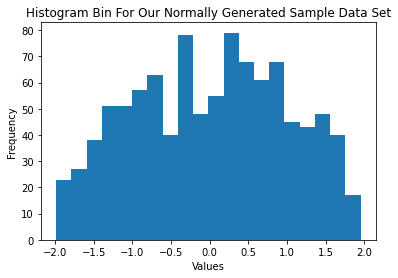

min: -1.9842690948978714 max: 1.9521797832035057


In [4]:
# Get a large sample to check bounds
sample = rand.rvs(size=1000)

# Plotting Histogram bin
plt.hist(sample, bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Bin For Our Normally Generated Sample Data Set')
plt.show()
print('min:', sample.min(), 'max:', sample.max())


## Setting Up Output Data (Y)

Here I have randomly generated 1000 random samples of Y using **np.random.rand** and then rounded them up to 1 and 0s.

In [5]:
# Generate random no. between 0 and 1
rand_Y = np.random.rand(1000) 

# Round them off to generate 1s and 0s for output
output = rand_Y #np.round(rand_Y)

y_value = output

# Display
output

array([9.77038063e-01, 2.38350264e-01, 3.05771782e-01, 4.40701646e-01,
       2.88079175e-01, 5.17414760e-01, 5.38683726e-01, 5.66421038e-02,
       8.30165176e-01, 9.96548619e-01, 1.35839360e-01, 9.16463747e-01,
       2.20093297e-01, 3.52234417e-01, 2.57793675e-01, 9.53119993e-01,
       9.68447345e-01, 6.01857466e-01, 9.80887601e-01, 7.13359032e-01,
       5.82250861e-01, 5.76589982e-01, 3.90404043e-01, 1.46114400e-01,
       1.94065180e-01, 1.12429500e-01, 9.61940663e-01, 5.41229247e-01,
       8.55999832e-01, 5.74073675e-01, 3.61765176e-01, 4.67342095e-01,
       4.23019028e-01, 7.54410862e-01, 7.14931771e-01, 9.67987280e-01,
       1.57208370e-02, 3.97513270e-01, 8.30143552e-01, 8.96646277e-01,
       9.40113926e-01, 6.56281701e-01, 7.95382082e-02, 5.81946243e-01,
       7.55703807e-01, 5.61438830e-01, 9.83442123e-01, 9.88816965e-01,
       1.36569166e-02, 6.00343126e-01, 3.74650548e-01, 4.83006466e-01,
       8.54020707e-02, 2.56226008e-02, 7.40271811e-01, 5.88843589e-01,
      

# **Section-1: Splitting our training and testing dataset**  

I have used **scikit** to split my dataset into training and testing set. As mentioned 90% of data is for training and 10% is for testing/validation. 

In [6]:
from sklearn.model_selection import train_test_split
# the test_size parameter sets test_size to 10 percent
X_train,X_test,Y_train,Y_test  = train_test_split(sample , output, test_size=0.1, random_state=42)

# **Section-2: Initialize Parameters**

I will initialize the weight with mean:0 and std:1. Our initialize parameters function takes layers_dim array where our layers info is saved and then initialize weights according to it.

**layers_dim** : Contain all the layers in the neural net including the input layer.

---

Here I used **He Initialization** to deal with **vanishing** and **exploding** gradient problem.

In [7]:
def initialize_parameters(layers_dim):
  
  np.random.seed(3)

  # Getting the total no. of layers
  L = len(layers_dim)
  
  # Dictionary where our parameters will be saved
  parameters={}

  # For every layer we will initialize our parameters W and b and save them on parameters dictionary
  for l in range(1,L):
    parameters['W'+str(l)] = np.random.randn(layers_dim[l],layers_dim[l-1]) * (np.sqrt(2/layers_dim[l-1]))
    parameters['b'+str(l)] = np.zeros((layers_dim[l],1))

    assert parameters['W'+str(l)].shape == (layers_dim[l],layers_dim[l-1])
    assert parameters['b'+str(l)].shape == (layers_dim[l],1)

  return parameters



In [8]:
# Here is the layers_dim 1->64->64->64->1

layers_dim = [1,64,64,64,1]
parameters = initialize_parameters(layers_dim)

# Shape of all the weights in parameters dictionary
print("W1 = " + str(parameters['W1']))
print("W2 = " + str(parameters['W2']))
print("W3 = " + str(parameters['W3']))
print("W4 = " + str(parameters['W4']))








W1 = [[ 2.52950265]
 [ 0.61731815]
 [ 0.13646803]
 [-2.63537665]
 [-0.39228616]
 [-0.50170496]
 [-0.11701413]
 [-0.88671286]
 [-0.06196825]
 [-0.67488821]
 [-1.85808535]
 [ 1.25104497]
 [ 1.24637193]
 [ 2.41770141]
 [ 0.07075826]
 [-0.57230029]
 [-0.77125543]
 [-2.18704919]
 [ 1.38927735]
 [-1.55714478]
 [-1.67590887]
 [-0.29083288]
 [ 2.10173116]
 [ 0.33476736]
 [-1.44785083]
 [-1.00832465]
 [ 0.88422991]
 [-0.22700018]
 [-1.08729879]
 [-0.32531257]
 [ 1.05366868]
 [ 2.79464267]
 [-1.75945609]
 [-0.88588729]
 [-1.13669691]
 [-3.42110023]
 [-1.30643921]
 [-1.44797899]
 [ 1.58954487]
 [-0.1865549 ]
 [-2.29567229]
 [ 0.9145372 ]
 [-0.50384294]
 [-2.4651737 ]
 [-0.84379002]
 [-0.83239815]
 [-1.2358562 ]
 [ 0.04202168]
 [-3.17951663]
 [-0.37867246]
 [ 1.43285776]
 [ 1.20603827]
 [ 1.56721379]
 [ 1.58305745]
 [ 2.10370367]
 [-1.58151599]
 [ 1.19618908]
 [-2.63169521]
 [-0.85260829]
 [-2.70747233]
 [ 1.48230443]
 [ 1.88619011]
 [-0.27918652]
 [ 2.50972707]]
W2 = [[-0.1192761   0.02662555  0.

### Visualization Of the Weights

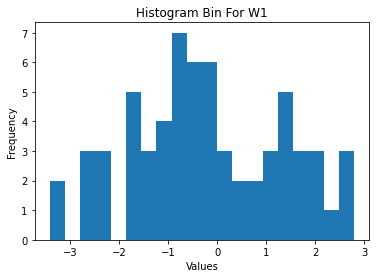

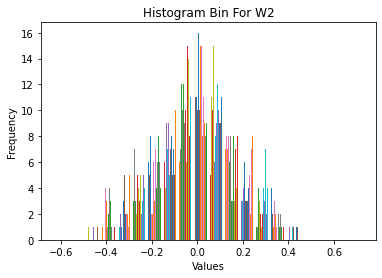

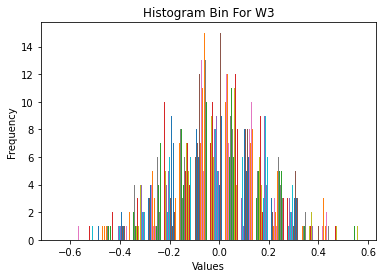

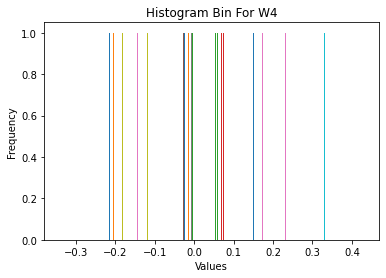

In [9]:
#Histogram binning for the weights
for i in range(1,len(layers_dim)):
  plt.hist(parameters['W'+str(i)], bins=20)
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.title('Histogram Bin For W{}'.format(str(i)))
  plt.show()



# **Section-3 : Forward Propagation**

## Creating here the Function For the Activation Function

### **RELU FUNCTION**

In [10]:
def RELU(Z):
  
  activation = np.maximum(0,Z)
  cache = Z

  return activation,cache

### **SIGMOID FUNCTION**

In [11]:
def Sigmoid(Z):
  
  activation= 1/(1+np.exp(-Z))
  cache=Z

  return activation,cache

## Creating Function For A Single Forward Propagation

Here I have created a function for forward propagation from one layer to another. 

It takes activation (previous), Parameters (W and b), and activation name as input.

If activation name is **RELU**, a forward propagation with RELU activation will be done.

If activation name is **Sigmoid**, a forward propagation with Sigmoid will be done.

**CACHE**: Here I'm saving caches because after forward propagation is completed they are going to be used in Backward Propagation. So, I save the caches for later use in the backward propagation.

NOTE: The Cache contains linear and activation cache.

**Linear cache**: A_prev, W, b for a single forward propagation

**Activation cache** : Z for a single forward propagation 

In [12]:
def linear_activation_forward(A_prev,W,b,activation_fn):
  
  if activation_fn == "RELU":
    # Generate Z
    Z = np.dot(W ,A_prev) + b
    # Generate activation
    A,activation_cache = RELU(Z)
  
  elif activation_fn == "Sigmoid":
    
    # Generate Z
    Z = np.dot(W ,A_prev) + b
    # Generate activation
    A,activation_cache = Sigmoid(Z)
  
  # saving the linear cache
  linear_cache = (A_prev,W,b)

  # saving linear and activation cache together for back propagation
  cache = (linear_cache,activation_cache)

  return A,cache



## Creating a Function For Complete Forward Propagation
Here I have created a function that uses above function and perform the complete forward propagation step.

It takes X and parameters as input.

**X**: The samples I generated for input

**parameters**: The parameters dictionary

This returns AL and caches:

**AL** : The output value or activation for the final layer

**caches** : An array that contains all the cache combined. 


In [13]:
def L_model_forward(X, parameters):
    
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W{:d}'.format(l)], parameters['b{:d}'.format(l)], activation_fn='RELU')
        caches.append(cache)
        
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W%d' % L], parameters['b%d' % L], activation_fn='Sigmoid')
    caches.append(cache)
            
    return AL, caches



## Testing Our Forward Propagation

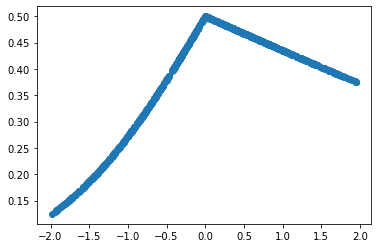

In [14]:
# Expanding dimension for our training data
X = np.expand_dims(X_train,axis=1).T

# Forward propagation where we save only final activation layer
output, _ = L_model_forward(X, parameters)

# Plotting training data against inferenced output
plt.scatter(X,output)

This shows our forward propagation output is maximum at point 0.0(mean) in the x-axis.

## Function To Compute Cost Using **Mean Square** Method

In [15]:
def cost_fn(AL,Y):

  # Get total values of Y
  m = Y.shape[0]
  
  # Y-AL
  diff = np.subtract(Y,AL)
  
  # (Y-AL)^2
  sq_diff = diff ** 2
  
  # Cost computation
  cost =  (1/m) * np.sum(sq_diff)
  
  # Reduce the dimension to remove any incompatability.
  cost = np.squeeze(cost)
  
  assert(cost.shape == ())
    
  return cost  



# Section-4: Back-Propagation

## Creating a function that computes back propagation for activation function



### **Sigmoid Backwards**
Here I have created a function that takes dA and cache as inputs and outputs you with 
**dJ/dZ** (differentiation) for a sigmoid layer.

In [16]:
def sigmoid_backward(dA, cache):
    
    # Use Z from cache
    Z = cache
    
    # Calculate derivative for sigmoid backwards
    s = 1/(1+np.exp(-Z))
    
    # Calculate dJ/dZ
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ


### **RELU Backwards**
Here I have created a function that takes dA and cache as inputs and outputs you with 
**dJ/dZ** (differentiation) for a RELU layer.

In [17]:
def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well.
    # Derivative for RELU layer 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ




## Creating a function that calculates dW, db and dA_prev using dZ and cache provided as input

In [18]:
def linear_backward(dZ, cache):
    
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1 / m * dZ @ A_prev.T
    db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = W.T @ dZ
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db



## Creating a function performs a single backward propagation using the activation name

In [19]:
def linear_activation_backward(dA, cache, activation_fn):
    
    linear_cache, activation_cache = cache
    
    if activation_fn == "RELU":
        
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation_fn == "Sigmoid":
        
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    return dA_prev, dW, db

## Creating A Function For Complete Forward Propagation

In [20]:
def L_model_backward(AL, Y, caches):
    
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = (-2/m) * ( Y - AL) # derivative of cost with respect to AL
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    #grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = None
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "Sigmoid")
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, "RELU")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
    return grads



# **Section-5: Update Parameters**

After everything is set and done, I will use gradient descent to update the parameters

In [21]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2

    for l in range(L):
        
        assert parameters["W" + str(l+1)].shape == grads["dW" + str(l+1)].shape
        assert parameters["b" + str(l+1)].shape == grads["db" + str(l+1)].shape
        
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * grads["dW" + str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * grads["db" + str(l+1)])

    return parameters



# **Section-6: Setup Everything And Start Training**

Here I have started the training process as stated in the problem.

Epoch I set is 20

Batch size is 1

And learning rate is 0.1

In [22]:
# Setting our X and Y
X = X_train 
Y = Y_train

# Our total no. of data samples in X
m = X.shape[0]

# Set learning rate and epoch
learning_rate = 0.1
epoch = 20
loss = []

for e in range(0,epoch):  
  
  # Initializing our total cost recorded
  J_sum=0

  for i in range(m):  
    
    x = X[i].reshape((1,1))
    y = Y[i].reshape((1,1))
  
    # Forward Propagation
    AL,caches = L_model_forward(x, parameters)
  
    # Compute Cost Function
    
    # Cost for single tuple in a sample
    J = cost_fn(AL,y) 
    
    J_sum = J_sum + J
    
    # Backward Propagation
    grad = L_model_backward(AL, y, caches)
  
    # Update Parameter
    parameters = update_parameters(parameters, grad, learning_rate)
  
  # Our average cost 
  total_cost = J_sum/m 
  
  loss.append(total_cost)
  
  print("Cost after epoch:{} = {}".format(e+1,total_cost))



Cost after epoch:1 = 0.08825000876676686
Cost after epoch:2 = 0.08405505243919584
Cost after epoch:3 = 0.08390296285146033
Cost after epoch:4 = 0.08385917589521193
Cost after epoch:5 = 0.08385192044246782
Cost after epoch:6 = 0.08384287386996118
Cost after epoch:7 = 0.08382793158524564
Cost after epoch:8 = 0.08382329395161062
Cost after epoch:9 = 0.08380393754521687
Cost after epoch:10 = 0.08379125807108209
Cost after epoch:11 = 0.08378399911422776
Cost after epoch:12 = 0.08376720516887269
Cost after epoch:13 = 0.08375041778609499
Cost after epoch:14 = 0.08375828062907179
Cost after epoch:15 = 0.08371511303175247
Cost after epoch:16 = 0.08370534002005829
Cost after epoch:17 = 0.08368323758793832
Cost after epoch:18 = 0.0836630691124093
Cost after epoch:19 = 0.0836398900674194
Cost after epoch:20 = 0.08361942070978115


# **Section-7: Evaluating Performance On Our Validation Data**

### Using mean square error to evaluate performance on the validation data

In [23]:
# Reshape our data from (100,) to (100,1) otherwise it will give an error
X_val = np.expand_dims(X_test,axis=1).T

#Forward propagate
Y_val, _ = L_model_forward(X_val, parameters)

#Calculating MSE
Mean_Square_Error = cost_fn(Y_val,Y_test)
print("Mean Square Error : {}".format(Mean_Square_Error))



Mean Square Error : 0.08358964673293214


## Evaluating our model performance per epoch

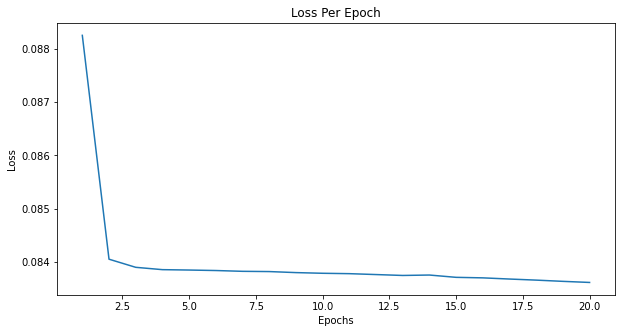

In [24]:
loss = np.array(loss)
epoch_steps = np.arange(1,epoch+1)

plt.figure(figsize=(10,5))
plt.plot(epoch_steps,loss)
plt.title('Loss Per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Ground Truth vs Inference

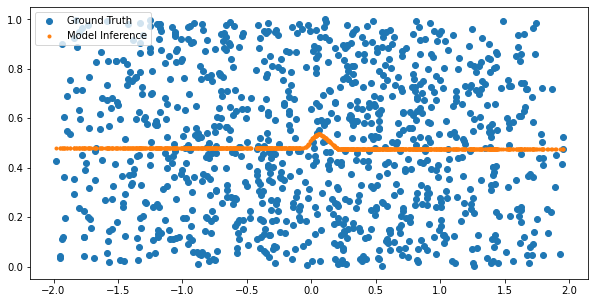

In [25]:
X = np.expand_dims(sample,axis=1).T
Y_hat,_ = L_model_forward(X, parameters)
Y_hat = np.squeeze(Y_hat)

plt.figure(figsize=(10,5))
plt.plot(sample, y_value, 'o', label='Ground Truth')
plt.plot(sample, Y_hat, '.', label='Model Inference')
plt.legend(loc='upper left')
plt.show()